<br>
<br>

<p style="font-size: 30px; text-align: center; "><b>Anime Recommendation System</b></p>

<br>
<br>

Nama    : Muhammad Reesa Rosyid

Email   : mreesa669@gmail.com

<h1 align='center'>Project Overview</h1>

***

Sistem rekomendasi adalah aplikasi yang sangat berguna dalam menghadirkan konten yang relevan kepada pengguna berdasarkan preferensi mereka[1]. Dalam konteks anime, sistem rekomendasi dapat membantu penggemar menemukan anime yang sesuai dengan minat dan selera mereka. Ada dua pendekatan utama yang digunakan dalam pengembangan sistem rekomendasi anime: content-based filtering dan collaborative filtering. Content-based filtering adalah salah satu metode rekomendasi yang mengandalkan analisis konten atau atribut dari item yang direkomendasikan[2]. Dalam konteks anime, atribut ini dapat mencakup genre, direktur, studio produksi, karakteristik plot, dan lain sebagainya. Sistem content-based filtering akan membandingkan preferensi pengguna dengan atribut-atribut ini untuk menyajikan rekomendasi yang cocok. Collaborative filtering adalah metode rekomendasi yang mengandalkan informasi dari pengguna lain untuk membuat rekomendasi[3]. Ini memanfaatkan pola perilaku pengguna yang mirip atau data historis dari sejumlah besar pengguna untuk menyajikan rekomendasi yang relevan. Dalam konteks anime, ini bisa berarti mengidentifikasi pengguna dengan minat yang serupa dan merekomendasikan anime yang disukai oleh pengguna serupa.

<h1 align='center'>Business Understanding</h1>

***

## Problem Statement

1. Bagaimana cara mendapatkan rekomendasi anime sesuai dengan genre yang pengguna suka?
2. Bagaimana cara mendapatkan rekomendasi anime berdasarkan aktivitas rating pengguna lain?

## Goals

1. Mendapatkan rekomendasi anime sesuai dengan genre yang pengguna suka dapat dibuat dengan metode system recomendation Contents Based Filtering.
2. Mendapatkan rekomendasi anime berdasarkan aktivitas rating pengguna lain dapat dibuat dengan metode system recomendation Collaborative Filtering.

<h1 align='center'>Data Understanding</h1>

***

Dataset ini merupakan data yang terdapat preferensi pengguna dari 73,516 orang terhadap 12,294 judul anime. Setiap pengguna dapat menambahkan anime yang dia sudah tonton dan dapat pula memberikan rating. Sehingga data ini juga merupakan kompilasi dari rating tersebut. Dataset ini dibagai ke dalam dua dokumen csv, yaitu anime.csv dan rating.csv. Perbedaan dari kedua data tersebut ialah, data anime.csv menampilkan title anime dan rating anime tersebut secara menyeluruh, sedangkan data rating.csv menampilkan rating yang telah diberikan oleh user.  Dataset ini penulis dapatkan dari kaggle dengan link sebagai berikut: [Link Dataset](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database).

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Data Loading

In [2]:
# Data loading
anime_df = pd.read_csv("./anime.csv")
rating_df = pd.read_csv("./rating.csv")

In [3]:
# Melihat anime_df
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# Info dari anime_df
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
# Melihat data rating_df
rating_df.head(100)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
95,1,14749,-1
96,1,14813,-1
97,1,14833,-1
98,1,14967,-1


In [6]:
# Info dari rating_df
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [7]:
# Akan dilihat total unique value pada anime_id dan user_id agar diketahui jumlah totalnya
print(f"Total film anime pada anime_df sebanyak {len(anime_df['anime_id'].unique())}")
print(f"Jumlah user pada rating_df sebanyak {len(rating_df['user_id'].unique())}")

Total film anime pada anime_df sebanyak 12294
Jumlah user pada rating_df sebanyak 73515


## Univariate Exploratory Data Analysis

<b>CONTENT</b>

Anime.csv:
* anime_id: id unik yang berasal dari [MyAnimeList.net](https://myanimelist.net/).
* name: judul dari anime.
* genre: genre dari anime tersebut.
* type: tipe dari anime tersebut. Seperti movie, TV, OVA, dan sebagainya.
* episodes: berapa banyak episode dalam anime tersebut. Jika hanya 1 episode maka dipastikan anime tersebut merupakan tipe movie.
* rating: rating ini merupakan rata-rata yang diberikan dari semua user.
* member: angka dari komunitas member yang berada pada grup suatu anime. Dengan kata lain, member merupakan total fanbase pada anime tersebut.

Rating.csv:
* user_id: id pengguna yang dihasilkan secara acak dan tidak dapat diidentifikasi.
* anime_id: sebuah anime yang telah di rating oleh user.
* rating: rating yang diberikan oleh user. Jika terdapat value -1, maka user telah menonton anime tersebut namun tidak memberikan rating.

### Feature Genre

Pada bagian ini, akan dilihat genre apa yang paling banyak pada dataset tersebut.

In [8]:
# Define a function to handle the conversion
def convert_to_list(x):
    if isinstance(x, str):
        return x.split(', ')
    else:
        return []  # Handle non-string values

<Axes: title={'center': 'Top 10 Genre Anime'}, xlabel='genre', ylabel='Count'>

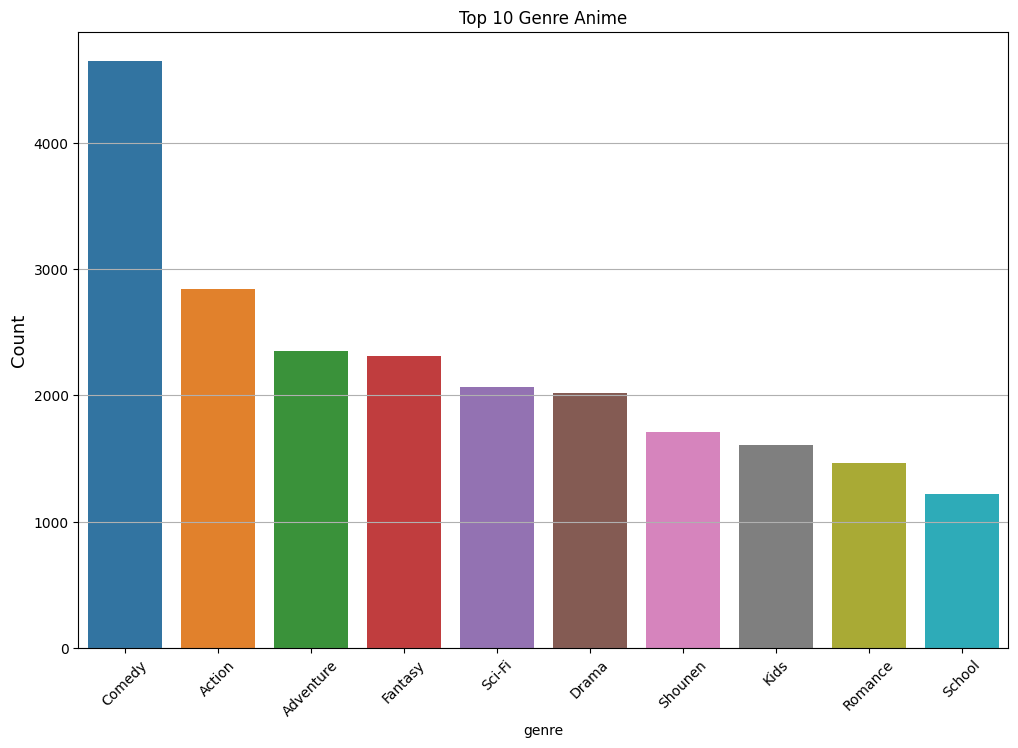

In [9]:
# Menggunakan .apply() untuk memisahkan teks menjadi daftar
anime_df['genre'] = anime_df['genre'].apply(convert_to_list)

# Mengekspansi kolom 'Genre' menjadi beberapa baris
df_genre_exploded = anime_df.explode('genre')

# Mengakses nilai unik dalam kolom 'Genre' yang sudah diexplode
unique_genres = df_genre_exploded['genre'].unique()

plt.figure(figsize=(12,8))
plt.xlabel('Frequency')
plt.ylabel("Count", fontsize=13)
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.xticks(rotation=45)
plt.title("Top 10 Genre Anime")
plt.grid(True)
plt.xticks(rotation=45)
sns.barplot(x=df_genre_exploded["genre"].value_counts().index[:10], y=df_genre_exploded["genre"].value_counts().values[:10])

Genre yang paling banyak pada dataset tersebut adalah comedy dengan jumlah lebih dari 4000 judul anime yang mengusung genre comedy, lalu di ikuti oleh action, dan seterusnya.

### Feature Type

Akan dilihat dari feature Type, tipe anime apa saja yang paling banyak pada dataset tersebut.

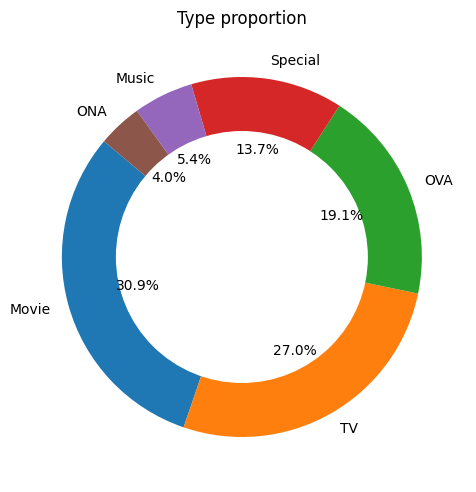

In [52]:
labels = anime_df['type'].unique()
labels = labels[:-1]
value = anime_df['type'].value_counts().tolist()
tot = sum(value)
percentages = [(value / tot) * 100 for value in value]

# Create a pie chart with value percentages inside
plt.pie(value, labels=labels, autopct='%.1f%%', startangle=140)

# Draw center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Type proportion")
plt.show()

Dapat dilihat anime move dan TV memiliki prosentase paling tinggi yaitu movie berjumlah 30.9% dan TV 27%.

### Feature Rating & Members

Pada bagian ini akan dilihat anime dengan rating tertinggi dan member terbanyak. Perlu diketahui bahwa suatu anime yang mendapatkan rating tinggi bukan berarti anime tersebut bagus secara keseluruhan. Sebagai contoh, misalkan terdapat anime A dengan rating 9.7/10 namun anime tersebut hanya memiliki member <100 orang, dan anime B dengan rating 8.5/10 namun memiliki member >1000000 orang. Maka anime A belum tentu lebih baik dari pada Anime B secara keseluruhan. Hal itu dapat dibuktikan dengan bar chart di bawah ini.

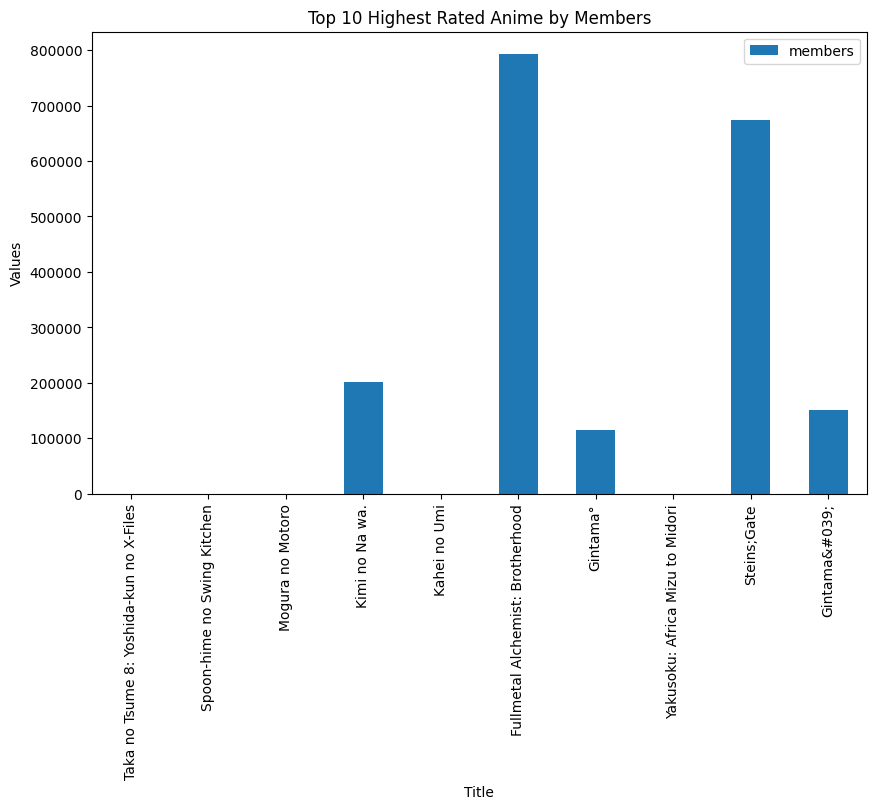

,members
name,
Taka no Tsume 8: Yoshida-kun no X-Files,13
Spoon-hime no Swing Kitchen,47
Mogura no Motoro,62
Kimi no Na wa.,200630
Kahei no Umi,44
Fullmetal Alchemist: Brotherhood,793665
Gintama°,114262
Yakusoku: Africa Mizu to Midori,53
Steins;Gate,673572


In [11]:
# Sort the DataFrame by 'Rating' in descending order
df_rating = anime_df.sort_values(by='rating', ascending=False).head(10)

# Set the 'Title' column as the index for plotting
df_rating.set_index('name', inplace=True)

# Select only the 'Members' and 'ScoredBy' columns
df_rating = df_rating[['members']]

# Create a multi bar plot
ax = df_rating.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Title')
plt.ylabel('Values')
plt.title('Top 10 Highest Rated Anime by Members')

# Show the plot
plt.show()

df_rating

Dari plot chart di atas selaras dengan apa yang penulis utarakan. Taka no Tsume 8: Yoshida-kun no X-Files memiliki rating paling tinggi namun hanya memiliki 13 member sedangkan Fullmetal Alchemist: Brotherhood berada di bawahnya namun memiliki member yang jauh lebih banyak yaitu sebanyak 793665 member. Untuk itu akan dibalik, plot yang awalnya diukur berdasarkan rating tertinggi, di bawah ini akan dilakukan plot berdasarkan member terbanyak.

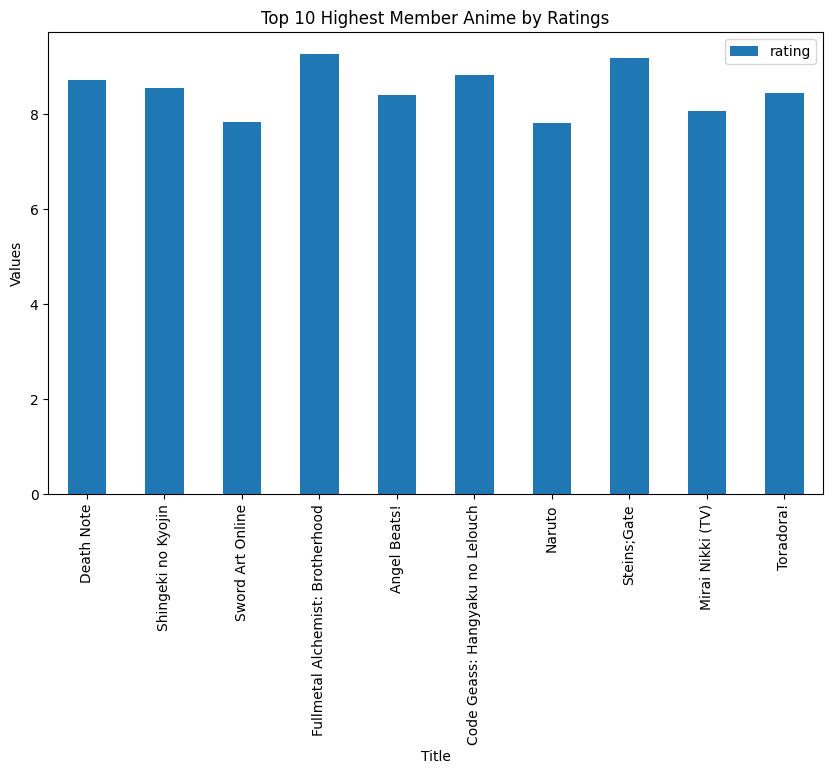

,rating
name,
Death Note,8.71
Shingeki no Kyojin,8.54
Sword Art Online,7.83
Fullmetal Alchemist: Brotherhood,9.26
Angel Beats!,8.39
Code Geass: Hangyaku no Lelouch,8.83
Naruto,7.81
Steins;Gate,9.17
Mirai Nikki (TV),8.07


In [12]:
# Sort the DataFrame by 'Rating' in descending order
df_rating = anime_df.sort_values(by='members', ascending=False).head(10)

# Set the 'Title' column as the index for plotting
df_rating.set_index('name', inplace=True)

# Select only the 'Members' and 'ScoredBy' columns
df_rating = df_rating[['rating']]

# Create a multi bar plot
ax = df_rating.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Title')
plt.ylabel('Values')
plt.title('Top 10 Highest Member Anime by Ratings')

# Show the plot
plt.show()

df_rating

Hasilnya dapat dilihat bahwa Fullmetal Alchemist: Brotherhood memiliki rating paling tinggi yaitu 9.26 dan memiliki member kurang lebih 700000 orang berdasarkan plot Top 10 Highest Rated Anime by Members.

<h1 align='center'>Data Preprocessing</h1>

***

## Menggabungkan Anime

In [13]:
# Menggabungkan rating_df dan anime_df berdasarkan anime_id
anime_all = np.concatenate((
    anime_df['anime_id'].unique(),
    rating_df['anime_id'].unique()
))
anime_all = np.short(np.unique(anime_all))

print(f"Jumlah seluruh data anime berdasarkan anime_id: {len(anime_all)}")

Jumlah seluruh data anime berdasarkan anime_id: 12297


In [14]:
# Menggabungkan kedua dataframe berdasarkan anime_id
df = pd.merge(anime_df, rating_df, on='anime_id', how='left')
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,278.0,-1.0


## Data Cleaning

In [15]:
# Cek missing value
df.isnull().sum()

anime_id       0
name           0
genre          0
type          28
episodes       0
rating_x     233
members        0
user_id     1097
rating_y    1097
dtype: int64

In [16]:
# Drop missing value
df = df.dropna()

In [17]:
# Cek kembali missing value yang telah didrop
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [18]:
# Mengecek data yang duplikat
df['genre'] = df['genre'].apply(tuple)
df.duplicated().sum()

1

In [19]:
# drop data duplicates
df = df.drop_duplicates()

In [20]:
# Cek ulang duplikasi data
df.duplicated().sum()

0

In [21]:
# Mengurutkan data berdasarkan anime_id
df = df.sort_values('anime_id', ascending=True)
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
208698,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)",TV,26,8.82,486824,51598.0,9.0
213581,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)",TV,26,8.82,486824,73014.0,10.0
213582,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)",TV,26,8.82,486824,73015.0,10.0
213583,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)",TV,26,8.82,486824,73023.0,10.0
213584,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)",TV,26,8.82,486824,73028.0,9.0


In [22]:
# Drop duplikasi dari anime_id yang disebabkan penggabungan rating_df dan anime_df
df = df.drop_duplicates('anime_id')
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
208698,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)",TV,26,8.82,486824,51598.0,9.0
981639,5,Cowboy Bebop: Tengoku no Tobira,"(Action, Drama, Mystery, Sci-Fi, Space)",Movie,1,8.40,137636,66624.0,9.0
1323695,6,Trigun,"(Action, Comedy, Sci-Fi)",TV,26,8.32,283069,67806.0,8.0
5475714,7,Witch Hunter Robin,"(Action, Drama, Magic, Mystery, Police, Supern...",TV,26,7.36,64905,59981.0,-1.0
6448940,8,Beet the Vandel Buster,"(Adventure, Fantasy, Shounen, Supernatural)",TV,52,7.06,9848,50437.0,-1.0


In [23]:
# Melihat jumlah data pada kolom anime_id, name, dan genre
anime_id = df['anime_id'].tolist()

name = df['name'].tolist()

genre = df['genre'].tolist()

print(len(anime_id))
print(len(name))
print(len(genre))

11194
11194
11194


In [24]:
# Membuat dataset baru berdasarkan anime_id, title, dan genre
anime = pd.DataFrame({
    'anime_id': anime_id,
    "title": name,
    'genre': genre
})

anime.head()

,anime_id,title,genre
0,1,Cowboy Bebop,"(Action, Adventure, Comedy, Drama, Sci-Fi, Space)"
1,5,Cowboy Bebop: Tengoku no Tobira,"(Action, Drama, Mystery, Sci-Fi, Space)"
2,6,Trigun,"(Action, Comedy, Sci-Fi)"
3,7,Witch Hunter Robin,"(Action, Drama, Magic, Mystery, Police, Supern..."
4,8,Beet the Vandel Buster,"(Adventure, Fantasy, Shounen, Supernatural)"


<h1 align='center'>Model Development Content Based Filtering</h1>

***

Content-based filtering adalah sebuah metode dalam sistem rekomendasi yang digunakan untuk memberikan rekomendasi kepada pengguna berdasarkan karakteristik atau konten dari item atau produk yang telah mereka sukai atau konsumsi sebelumnya. Metode ini memeriksa kesamaan antara item yang telah disukai oleh pengguna dan item-item lainnya berdasarkan fitur atau atribut tertentu.

Berikut adalah beberapa karakteristik utama dari content-based filtering:
1. Ekstraksi Fitur: Sistem content-based filtering pertama-tama mengidentifikasi fitur atau atribut yang relevan dari item atau produk yang ingin direkomendasikan. Misalnya, dalam sistem rekomendasi film, fitur-fitur bisa mencakup genre, sutradara, aktor, tahun rilis, dan lain sebagainya.
2. Profil Pengguna: Sistem ini juga membangun profil pengguna berdasarkan preferensi mereka terhadap item-item yang telah mereka beri peringkat atau konsumsi sebelumnya. Profil ini mencerminkan preferensi pengguna terhadap atribut-atribut tertentu.
3. Perbandingan Berbasis Kesamaan: Sistem kemudian mencari item-item lain yang memiliki kesamaan dengan preferensi pengguna berdasarkan atribut-atribut yang ada dalam profil pengguna. Ini bisa dilakukan dengan menggunakan berbagai metode perbandingan, seperti perhitungan kesamaan kosinus atau algoritma lainnya.
4. Rekomendasi: Setelah sistem mengidentifikasi item yang mirip dengan preferensi pengguna, ia akan merekomendasikan item-item tersebut kepada pengguna.

Keuntungan dari content-based filtering adalah bahwa ia dapat memberikan rekomendasi yang lebih personal karena mempertimbangkan preferensi individu pengguna. Namun, batas utamanya adalah kurangnya variasi dalam rekomendasi, karena hanya akan merekomendasikan item yang mirip dengan yang sudah disukai pengguna.

## TF_IDF Vectorizer

Tfidf Vectorizer adalah alat atau komponen yang digunakan dalam pemrosesan teks untuk mengubah teks menjadi vektor numerik berdasarkan nilai tf-idf. Ini adalah salah satu tahap yang umumnya diterapkan dalam pemrosesan teks sebelum menerapkan berbagai algoritma pembelajaran mesin atau analisis statistik.

Berikut adalah cara kerja Tfidf Vectorizer:
1. Term Frequency (TF): Ini mengukur seberapa sering kata atau istilah tertentu muncul dalam suatu dokumen. Ini dapat dihitung dengan cara menghitung jumlah kemunculan kata tersebut dalam dokumen dan kemudian dibagi dengan jumlah total kata dalam dokumen.
2. Inverse Document Frequency (IDF): Ini mengukur seberapa pentingnya suatu kata atau istilah dalam seluruh koleksi dokumen. Kata yang muncul lebih sering dalam banyak dokumen akan memiliki nilai IDF yang lebih rendah, sedangkan kata yang jarang muncul akan memiliki nilai IDF yang lebih tinggi. IDF dihitung dengan rumus logaritmik yang melibatkan jumlah total dokumen dalam koleksi dan jumlah dokumen yang mengandung kata tersebut.
3. Tf-idf Score: Ini adalah hasil perkalian antara nilai TF dan IDF untuk suatu kata dalam suatu dokumen. Dengan demikian, kata-kata yang sering muncul dalam suatu dokumen tetapi jarang muncul dalam dokumen lain akan memiliki skor Tf-idf yang tinggi.
4. Vektorisasi: Setelah menghitung Tf-idf score untuk setiap kata dalam setiap dokumen, Tfidf Vectorizer menghasilkan vektor numerik untuk setiap dokumen. Setiap dimensi vektor akan mewakili kata atau istilah tertentu, dan nilainya adalah skor Tf-idf dari kata tersebut dalam dokumen tersebut.

In [25]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Convert lists of genres into text strings
anime['genre'] = anime['genre'].apply(lambda x: ' '.join(x))

# Melakukan perhitungan idf pada data cuisine
tfidf.fit(anime['genre'])

# Mapping array dari fitur index integer ke fitur nama
tfidf.get_feature_names_out() 

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [26]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(anime['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(11194, 47)

In [27]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.31597153, 0.34212335, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2997033 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.488683  , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.38170399, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [28]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan judul anime
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tfidf.get_feature_names_out(),
    index=anime['title']
).sample(22, axis=1).sample(10, axis=0)

,drama,samurai,kids,military,adventure,supernatural,police,fantasy,thriller,mecha,...,hentai,horror,of,space,yuri,historical,power,arts,josei,sports
title,,,,,,,,,,,,,,,,,,,,,
Penguin no Mondai Movie,0.000000,0.0,0.848476,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Dance in the Vampire Bund Recap,0.000000,0.0,0.000000,0.000000,0.000000,0.484543,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Casshern Sins,0.361663,0.0,0.000000,0.000000,0.339991,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Soliton no Akuma,0.435169,0.0,0.000000,0.670109,0.000000,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Chouon Senshi Borgman: Lovers Rain,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
The Siamese: First Mission,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Working!!,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.546133,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Genei Toshi,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Macross Plus,0.307619,0.0,0.000000,0.473698,0.000000,0.000000,0.00000,0.0,0.0,0.386108,...,0.0,0.0,0.000000,0.487364,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

Cosine similarity adalah sebuah metrik yang digunakan untuk mengukur sejauh mana dua vektor berada dalam posisi yang sama dalam ruang multidimensional. Ini sering digunakan dalam pemrosesan bahasa alami dan pengambilan informasi untuk mengukur seberapa mirip dua dokumen teks atau dua vektor fitur dalam konteks analisis teks. Cosine similarity mengukur kedekatan antara dua vektor dengan mengukur sudut antara vektor-vektor tersebut dalam ruang berdimensi tinggi.

Cara kerja cosine similarity adalah sebagai berikut:
1. Representasi vektor: Pertama, dokumen atau entitas yang ingin dibandingkan direpresentasikan sebagai vektor dalam ruang fitur. Dalam konteks pemrosesan teks, ini bisa berarti mewakili setiap dokumen sebagai vektor yang berisi nilai-nilai berdasarkan representasi seperti TF-IDF (Term Frequency-Inverse Document Frequency) atau word embeddings (misalnya, Word2Vec atau GloVe).
2. Perhitungan dot product: Selanjutnya, cosine similarity mengukur dot product (hasil kali dalam) antara dua vektor yang ingin dibandingkan. Dot product adalah jumlah hasil perkalian elemen-elemen yang sesuai dari dua vektor.
3. Pengukuran panjang vektor: Setiap vektor diukur panjangnya (magnitude) dalam ruang fitur. Ini dapat dihitung dengan menggunakan norma Euclidean (L2-norm) dari vektor.
4. Perhitungan cosine similarity: Cosine similarity dihitung dengan membagi dot product dua vektor dengan hasil kali panjang vektor masing-masing. Rumusnya adalah sebagai berikut:
$$\text{Cosine Similarity (cos }\theta) = \frac{{\mathbf{A} \cdot \mathbf{B}}}{{\|\mathbf{A}\| \cdot \|\mathbf{B}\|}}$$
* A dan B adalah dua vektor yang ingin dibandingkan.
* (A . B) adalah dot product antara vektor A dan B.
* ||A|| adalah panjang (magnitude) vektor A.
* ||B|| adalah panjang (magnitude) vektor B.

Hasil cosine similarity akan selalu dalam rentang nilai antara -1 hingga 1. Nilai 1 menunjukkan bahwa dua vektor adalah identik (sama persis), nilai 0 menunjukkan bahwa dua vektor adalah sepenuhnya ortogonal (tidak ada kesamaan), dan nilai -1 menunjukkan bahwa dua vektor adalah kebalikan sempurna satu sama lain dalam ruang fitur.

In [29]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.77551957, 0.6465777 , ..., 0.12060759, 0.28124296,
        0.25560902],
       [0.77551957, 1.        , 0.51744148, ..., 0.11439794, 0.26676278,
        0.        ],
       [0.6465777 , 0.51744148, 1.        , ..., 0.18653225, 0.43497164,
        0.39532607],
       ...,
       [0.12060759, 0.11439794, 0.18653225, ..., 1.        , 0.        ,
        0.        ],
       [0.28124296, 0.26676278, 0.43497164, ..., 0.        , 1.        ,
        0.        ],
       [0.25560902, 0.        , 0.39532607, ..., 0.        , 0.        ,
        1.        ]])

In [30]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['title'], columns=anime['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11194, 11194)


title,Reideen,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Akai Boushi,Bakuretsu Hunters,Anime TV de Hakken! Tamagotchi
title,,,,,
Maid of the Dead,0.000000,0.139915,0.000000,0.096223,0.107812
Tono to Issho: Ippunkan Gekijou,0.000000,0.097310,0.000000,0.066922,0.074982
Alps no Shoujo Heidi: Alm no Yama-hen,0.000000,0.187309,0.651516,0.000000,0.605501
Momotarou,0.000000,0.495184,0.000000,0.000000,0.000000
Yama Nezumi Rocky Chuck,0.000000,0.000000,0.000000,0.349396,0.475227
Mizu no Tane,0.000000,0.000000,0.000000,0.000000,0.000000
Ai wa Kagi no Kazu dake... Fuuzoku Mansion,0.000000,0.000000,0.000000,0.000000,0.000000
Najica Dengeki Sakusen,0.573005,0.108205,0.000000,0.367055,0.083378
Toki wo Kakeru Shoujo,0.414984,0.487785,0.000000,0.134666,0.000000


## Evaluate Model Untuk Mendapatkan Rekomendasi

In [31]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=anime[['title', 'genre']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Untuk mengevaluasi model dari content based filtering, akan dilakukan pengetesan secara langsung. Misalkan penonton telah menonton anime berjudul Kimi no Na Wa dengan genre yang meliputi yaitu Drama, Romance, School, dan Supernatural. Maka sistem akan merekomendasikan anime dengan judul yang serupa.

In [32]:
anime_recommendations('Kimi no Na wa.')

,title,genre
0,Wind: A Breath of Heart (TV),Drama Romance School Supernatural
1,Wind: A Breath of Heart OVA,Drama Romance School Supernatural
2,Aura: Maryuuin Kouga Saigo no Tatakai,Comedy Drama Romance School Supernatural
3,Angel Beats!: Another Epilogue,Drama School Supernatural
4,Harmonie,Drama School Supernatural


<h1 align='center'>Model Development dengan Collaborative Filtering</h1>

***

RecommenderNet adalah jenis sistem rekomendasi yang menggunakan pendekatan berbasis jaringan (network-based) untuk memberikan rekomendasi kepada pengguna. Sistem ini memanfaatkan informasi tentang hubungan atau koneksi antar entitas, seperti pengguna, item, atau bahkan entitas lain yang relevan, untuk menghasilkan rekomendasi yang lebih baik.

Berikut beberapa hal yang dapat dicakup oleh RecommenderNet:
1. Pengguna dan Item sebagai Node: Dalam RecommenderNet, pengguna dan item (misalnya, produk, film, atau konten lain) diwakili sebagai node dalam jaringan. Hubungan antara pengguna dan item, serta hubungan lain yang relevan, dinyatakan sebagai edge (sisi) di antara node-node ini.
2. Model Jaringan: Model jaringan digunakan untuk menganalisis dan memahami struktur hubungan di antara node-node tersebut. Ini dapat mencakup model jaringan sosial, model grafik, atau model jaringan lainnya.
3. Propagasi Informasi: Informasi atau preferensi dari satu node dapat "mengalir" atau "menyebar" melalui jaringan untuk mempengaruhi node lainnya. Ini memungkinkan model untuk memahami pengaruh pengguna terhadap item yang mereka sukai, serta pengaruh item terhadap preferensi pengguna.
4. Klasifikasi dan Rekomendasi: Dengan memahami hubungan di antara node-node dalam jaringan, RecommenderNet dapat melakukan klasifikasi atau rekomendasi. Misalnya, jika seorang pengguna A memiliki hubungan dengan pengguna B dan pengguna B menyukai beberapa item, sistem dapat merekomendasikan item tersebut kepada pengguna A berdasarkan hubungan mereka dengan pengguna B.

Keuntungan dari RecommenderNet adalah kemampuannya untuk memanfaatkan informasi struktural dan hubungan dalam jaringan untuk menghasilkan rekomendasi yang lebih kontekstual dan relevan. Ini dapat berguna dalam skenario seperti rekomendasi teman-teman dalam jaringan sosial, rekomendasi produk dalam jaringan e-commerce, atau rekomendasi konten dalam jaringan media sosial.

## Data Preprocessing

Data rating_df diperlukan untuk melatih model dengan metode collaborative filtering, dikarenakan data tersebut berisikan penonton anime yang merating anime/film yang telah ditonton. Hal tersebut dapat menjadi suatu sistem rekomendasi dari pengguna ke pengguna lain.

In [33]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [34]:
# liat value dari rating
rating_df['rating'].value_counts()

rating
 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: count, dtype: int64

Terdapat rating -1, dapat dilihat pada informasi dataset bahwa rating -1 dari user berarti user yang telah menonton suatu anime namun tidak merating anime tersebut. Maka nilai -1 akan dilakukan drop.

In [35]:
rating_df = rating_df[rating_df['rating']!= -1]
rating_df.reset_index(drop=True, inplace=True)
rating_df.head()

,user_id,anime_id,rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10


In [36]:
# Check kembali rating, apakah rating dengan nilai -1 masih ada atau tidak
rating_df['rating'].value_counts()

rating
8     1646019
7     1375287
9     1254096
10     955715
6      637775
5      282806
4      104291
3       41453
2       23150
1       16649
Name: count, dtype: int64

In [37]:
rating_df.head()

,user_id,anime_id,rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10


In [38]:
# Encoder user_id
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

In [39]:
# Encoder anime_id
anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

In [40]:
# Menambahkan encoder anime_id dan user_id pada rating_df
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)

rating_df.head()

,user_id,anime_id,rating,user,anime
0,1,8074,10,0,0
1,1,11617,10,0,1
2,1,11757,10,0,2
3,1,15451,10,0,3
4,2,11771,10,1,4


In [41]:
# Mengetahui jumlah user dan anime
num_users = len(user2user_encoded)
num_animes = len(anime_encoded2anime)

print(num_animes)
print(num_users)

9927
69600


In [42]:
rating_df["rating"] = rating_df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(rating_df["rating"])
max_rating = max(rating_df["rating"])
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_animes, min_rating, max_rating
    )
)

Number of users: 69600, Number of Movies: 9927, Min rating: 1.0, Max rating: 10.0


In [43]:
rating_df = rating_df.sample(frac=1, random_state=42)

In [44]:
# Membagi data training dan testing
x = rating_df[["user", "anime"]].values

y = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * rating_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)


## Training

In [45]:
EMBEDDING_SIZE = 32
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            mask_zero=True
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            mask_zero=True
        )
        self.movie_bias = layers.Embedding(num_movies, 1)
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

In [46]:
model = RecommenderNet(num_users, num_animes, EMBEDDING_SIZE)
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [47]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
79216/79216 [==============================] - 463s 6ms/step - loss: 0.5606 - root_mean_squared_error: 0.1691 - val_loss: 0.5762 - val_root_mean_squared_error: 0.1783
Epoch 2/5
79216/79216 [==============================] - 464s 6ms/step - loss: 0.5879 - root_mean_squared_error: 0.1851 - val_loss: 0.5955 - val_root_mean_squared_error: 0.1890
Epoch 3/5
79216/79216 [==============================] - 456s 6ms/step - loss: 0.6018 - root_mean_squared_error: 0.1924 - val_loss: 0.6075 - val_root_mean_squared_error: 0.1959
Epoch 4/5
79216/79216 [==============================] - 459s 6ms/step - loss: 0.6113 - root_mean_squared_error: 0.1979 - val_loss: 0.6146 - val_root_mean_squared_error: 0.1998
Epoch 5/5
79216/79216 [==============================] - 494s 6ms/step - loss: 0.6160 - root_mean_squared_error: 0.2003 - val_loss: 0.6174 - val_root_mean_squared_error: 0.2005


In [48]:
# Evaluate model dan summary model
model.summary()
test_loss = model.evaluate(x_val, y_val)
print('\\nTest Loss: {}'.format(test_loss))

Model: "recommender_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  2227200   
                                                                 
 embedding_1 (Embedding)     multiple                  69600     
                                                                 
 embedding_2 (Embedding)     multiple                  317664    
                                                                 
 embedding_3 (Embedding)     multiple                  9927      
                                                                 
Total params: 2,624,391
Trainable params: 2,624,391
Non-trainable params: 0
_________________________________________________________________
39608/39608 [==============================] - 129s 3ms/step - loss: 0.5849 - root_mean_squared_error: 0.1721
\nTest Loss: [0.5849184989929199, 0.17210653424263]


In [49]:
anime.head()

,anime_id,title,genre
0,1,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space
1,5,Cowboy Bebop: Tengoku no Tobira,Action Drama Mystery Sci-Fi Space
2,6,Trigun,Action Comedy Sci-Fi
3,7,Witch Hunter Robin,Action Drama Magic Mystery Police Supernatural
4,8,Beet the Vandel Buster,Adventure Fantasy Shounen Supernatural


## Mendapatkan Rekomendasi

In [50]:
rat_df = pd.read_csv('./rating.csv')

user_id = rat_df['user_id'].sample(1).iloc[0]
anime_watched_by_user = rat_df[rat_df['user_id']==user_id]

anime_not_watched = anime[~anime['anime_id'].isin(anime_watched_by_user['anime_id'].values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [51]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime[anime['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.title, ':', row.genre)
    

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
 
recommended_anime = anime[anime['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.title, ':', row.genre)

258/258 [==============================] - 1s 2ms/step
Showing recommendations for users: 49503
Anime with high ratings from user
--------------------------------
Cowboy Bebop : Action Adventure Comedy Drama Sci-Fi Space
Onegai☆Teacher : Comedy Drama Romance School Sci-Fi
Great Teacher Onizuka : Comedy Drama School Shounen Slice of Life
Howl no Ugoku Shiro : Adventure Drama Fantasy Romance
Onegai☆Teacher: Himitsu na Futari : Comedy Ecchi Romance Sci-Fi
--------------------------------
Top 10 anime recommendation
--------------------------------
Ginga Eiyuu Densetsu : Drama Military Sci-Fi Space
Lupin III: Cagliostro no Shiro : Adventure Comedy Shounen
Fate/Zero : Action Fantasy Supernatural
Hunter x Hunter (2011) : Action Adventure Shounen Super Power
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Gintama&#039;: Enchousen : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Monogatari Series: Second Season : Comedy Myste

Dapat dilihat anime yang user tersebut berikan rating tiggi diantaranya memiliki genre Action, Adventure, Comedy, Drama, Sci-Fi, Space, dan lain sebagainya. Lalu hasil rekomendasinya juga menampilkan anime dengan genre yang mirip-mirip dengan apa yang user 49503 berikan.

<h1 align='center'>Referensi</h1>

***

[1]	S. Jayalakshmi, N. Ganesh, R. Čep, and J. S. Murugan, “Movie Recommender Systems: Concepts, Methods, Challenges, and Future Directions,” Sensors, vol. 22, no. 13, Jul. 2022, doi: 10.3390/s22134904.

[2]	H. S. Kusuma and A. Musdholifah, “Recommendation System for Thesis Topics Using Content-based Filtering,” IJCCS (Indonesian Journal of Computing and Cybernetics Systems), vol. 15, no. 1, p. 65, Jan. 2021, doi: 10.22146/ijccs.62716.

[3]	P. B. Thorat, R. M. Goudar, and S. Barve, “Survey on Collaborative Filtering, Content-based Filtering and Hybrid Recommendation System,” 2015.
